In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        file_path = os.path.join(dirname, filename)
microbe_data = pd.read_csv(file_path)
microbe_data.microorganisms.unique()

test = microbe_data.groupby('microorganisms').Eccentricity
print(test)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microbes-dataset/microbes.csv


In [3]:
microbe_data.columns

Index(['Unnamed: 0', 'Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema',
       'FilledArea', 'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1',
       'BoundingBox2', 'BoundingBox3', 'BoundingBox4', 'ConvexHull1',
       'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'MajorAxisLength',
       'MinorAxisLength', 'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2',
       'Area', 'raddi', 'microorganisms'],
      dtype='object')

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting relevant columns
relevant_columns = ['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema',
       'FilledArea', 'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1',
       'BoundingBox2', 'BoundingBox3', 'BoundingBox4', 'ConvexHull1',
       'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'MajorAxisLength',
       'MinorAxisLength', 'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2',
       'Area', 'raddi']

# Filter the DataFrame to include only rows with 'Spirogyra' or 
#'Volvox' in the 'microorganisms' column
filtered_data = microbe_data[microbe_data['microorganisms'].isin(['Spirogyra', 'Volvox'])]

data_selected = filtered_data[relevant_columns]

# Handling missing values by dropping them
data_cleaned = data_selected.dropna()

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Applying PCA
pca = PCA(n_components=2)  # We reduce the dimensionality to 2 for visualization purposes
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['Spirogyra', 'Volvox'])

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

principal_df.head(), explained_variance

(   Spirogyra    Volvox
 0   0.760395 -3.335154
 1   0.604799 -2.653884
 2   0.444177 -2.412177
 3   0.905136 -0.343431
 4  15.050862  7.624911,
 array([0.35498661, 0.28122177]))

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Visualization of PCA results
plt.figure(figsize=(8, 8))
plt.scatter(principal_df['Spirogyra'], principal_df['Volvox'], alpha=0.5)
plt.title('Scatter plot of Principal Components')
plt.xlabel('Spirogyra')
plt.ylabel('Volvox')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


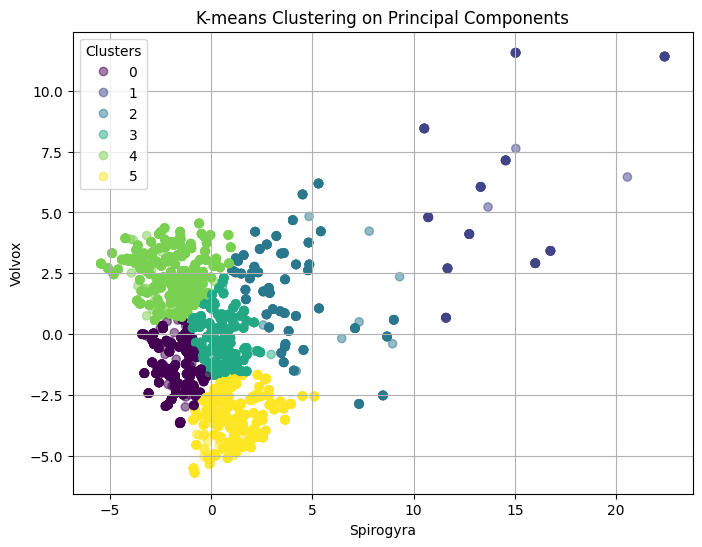

In [19]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=6, random_state=0).fit(principal_df)
labels = kmeans.labels_

# Visualization of clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_df['Spirogyra'], principal_df['Volvox'], c=labels, alpha=0.5)
plt.title('K-means Clustering on Principal Components')
plt.xlabel('Spirogyra')
plt.ylabel('Volvox')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()

In [7]:


# Filter the DataFrame to include only rows with 'Spirogyra' or 
#'Volvox' in the 'microorganisms' column
filtered_data = microbe_data[microbe_data['microorganisms'].isin(['Spirogyra', 'Ulotrix'])]

data_selected = filtered_data[relevant_columns]

# Handling missing values by dropping them
data_cleaned = data_selected.dropna()

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Applying PCA
pca = PCA(n_components=2)  # We reduce the dimensionality to 2 for visualization purposes
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['Spirogyra', 'Ulotrix'])

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

principal_df.head(), explained_variance

(   Spirogyra    Ulotrix
 0   3.937749  -2.358345
 1   3.777535  -1.715677
 2   3.606634  -1.700815
 3   4.758087   1.028194
 4  27.183654  11.967971,
 array([0.41684161, 0.3050434 ]))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


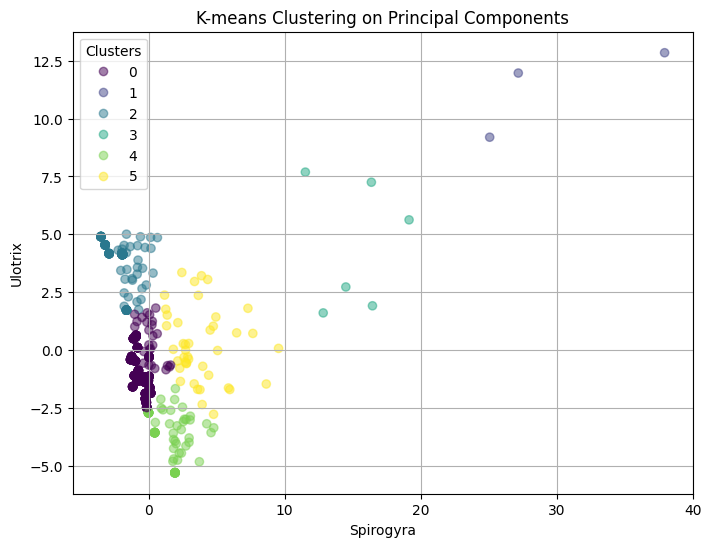

In [12]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=6, random_state=0).fit(principal_df)
labels = kmeans.labels_

# Visualization of clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_df['Spirogyra'], principal_df['Ulotrix'], c=labels, alpha=0.5)
plt.title('K-means Clustering on Principal Components')
plt.xlabel('Spirogyra')
plt.ylabel('Ulotrix')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()